In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

#### 1. Data Processing

In [9]:
# Load spreadsheet
df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['storkreds', 'alder'])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.shape, f"- {df.shape[0]} rows with {df.shape[1]} features")
X.head()

(867, 53) - 867 rows with 53 features


,530,531,533,534,535,537,538,540,541,543,544,545,546,547,548,550,551,552,553,555,556,557,559,561,563,navn,parti,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1
1,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0
2,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2
3,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0
4,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2


In [10]:
df = df[df['parti'] != 'Løsgænger']
df.dropna()
print(df.shape, f"- {df.shape[0]} rows with {df.shape[1]} features")

(864, 53) - 864 rows with 53 features


In [28]:
# 4 columns of data (cm), going to use PCA
# with 4 columns of result.
# The explained_variance_ratio_ tells us that
# by using 1 principal component, we will get
# 73% of the variance

df = pd.read_excel('alldata.xlsx', engine='openpyxl')
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

X_s = preprocessing.StandardScaler().fit_transform(X)
pca4 = decomposition.PCA(n_components=None)
res4 = pca4.fit_transform(X_s)
pca4.explained_variance_ratio_

array([0.41737636, 0.10259865, 0.04976015, 0.04300927, 0.0293233 ,
       0.0237033 , 0.01994712, 0.01697463, 0.01676652, 0.01608279,
       0.01527152, 0.01449084, 0.01303718, 0.01297392, 0.01200226,
       0.01125725, 0.0102922 , 0.00997773, 0.00986747, 0.00966786,
       0.00928391, 0.0089641 , 0.00877818, 0.00786085, 0.00755989,
       0.00722701, 0.00682415, 0.00670982, 0.00626662, 0.00605007,
       0.00582534, 0.0055948 , 0.0052595 , 0.00505699, 0.00473416,
       0.00466639, 0.00453667, 0.00416406, 0.00398844, 0.00388108,
       0.00341904, 0.00330379, 0.0029882 , 0.00290354, 0.00251036,
       0.00244041, 0.00210387, 0.00141116, 0.00130729])

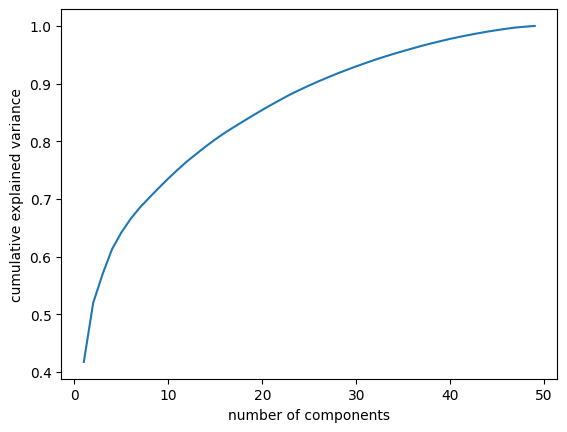

In [12]:
x = list(range(1, 1 + len(pca4.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.gca().invert_yaxis()
plt.show()

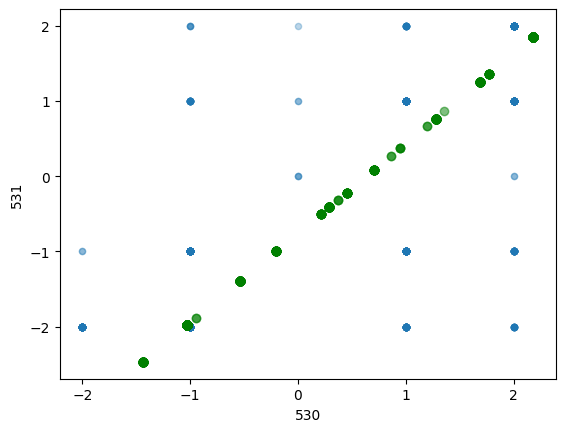

In [15]:
# 1D visualization of PCA
# (first 2 columns of iris)
xy = dict(zip('xy', df.columns[:2]))
X = df.iloc[:,:2]
X.plot(kind='scatter', **xy, alpha=.3)
pca1 = decomposition.PCA(n_components=1)
res = pca1.fit_transform(X)
flat = pca1.inverse_transform(res)
plt.scatter(flat[:, 0], flat[:, 1], c='g', alpha=.5);


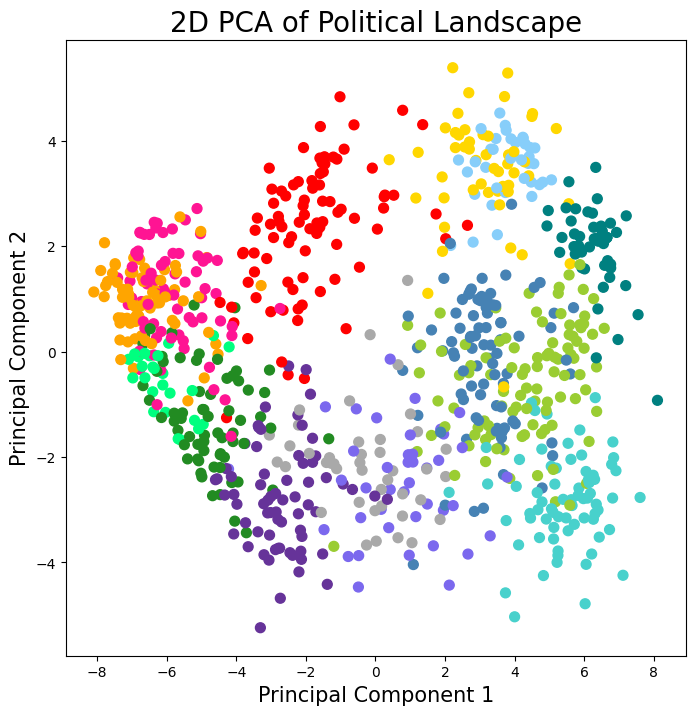

In [25]:
df = pd.read_excel('alldata.xlsx', engine='openpyxl')

# Extracting the numerical data
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])

# Standardizing the data
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standardized)

principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Merging with the original data to include names and parties
finalDf = pd.concat([principalDf, df[['navn', 'parti']]], axis=1)

finalDf = finalDf.dropna()
finalDf = finalDf[finalDf['parti'] != 'Løsgænger']

party_colors = {
    'Socialdemokratiet' : 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Create a 'color' column in your DataFrame based on the party
finalDf['color'] = finalDf['parti'].map(party_colors)

# Visualizing 2D projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA of Political Landscape', fontsize=20)

# Use the 'color' column for the c parameter in scatter
scatter = ax.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'], c=finalDf['color'], s=50)

# Create a custom legend for parties
#from matplotlib.lines import Line2D
#legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=party_colors[key], markersize=10, label=key) for key in party_colors.keys()]
#ax.legend(handles=legend_elements, title="Parti")

# If you still want to annotate names, uncomment the following:
# for i, txt in enumerate(finalDf['navn']):
#    ax.annotate(txt, (finalDf['Principal Component 1'].iloc[i], finalDf['Principal Component 2'].iloc[i]))

plt.show()

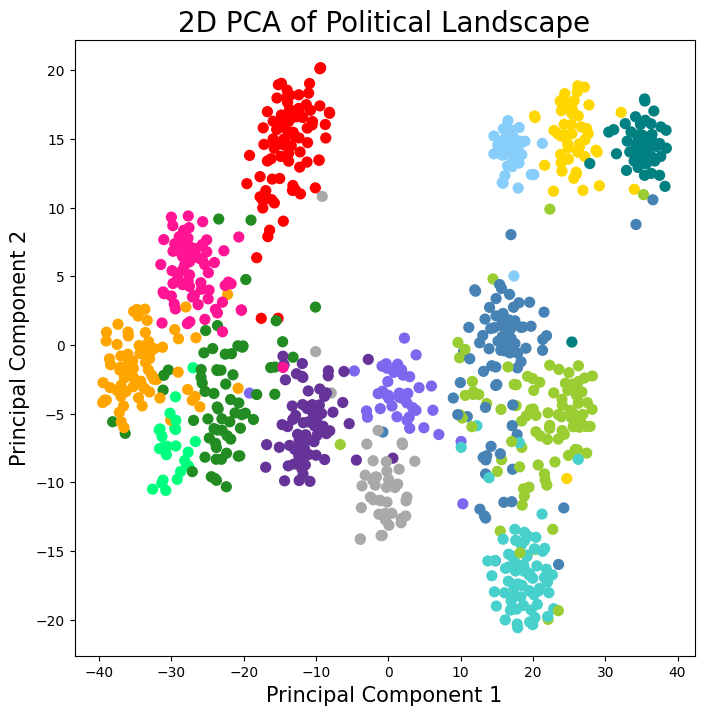

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
candidates_tsne = tsne.fit_transform(X_standardized)
principalDf = pd.DataFrame(data=candidates_tsne, columns=['Principal Component 1', 'Principal Component 2'])

# Merging with the original data to include names and parties
finalDf = pd.concat([principalDf, df[['navn', 'parti']]], axis=1)
finalDf = finalDf.dropna()
finalDf = finalDf[finalDf['parti'] != 'Løsgænger']

party_colors = {
    'Socialdemokratiet' : 'red',
    'Radikale Venstre': 'rebeccapurple',
    'Det Konservative Folkeparti': 'yellowgreen',
    'Nye Borgerlige': 'teal',
    'Socialistisk Folkeparti': 'deeppink',
    'Liberal Alliance': 'mediumturquoise',
    'Kristendemokraterne': 'darkgray',
    'Moderaterne': 'mediumslateblue',
    'Dansk Folkeparti': 'gold',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'springgreen',
    'Venstre': 'steelblue',
    'Danmarksdemokraterne': 'lightskyblue',
    'Enhedslisten': 'orange',
    'Alternativet': 'forestgreen'
}

# Create a 'color' column in your DataFrame based on the party
finalDf['color'] = finalDf['parti'].map(party_colors)

# Visualizing 2D projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA of Political Landscape', fontsize=20)

# Use the 'color' column for the c parameter in scatter
scatter = ax.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'], c=finalDf['color'], s=50)

# Create a custom legend for parties
#from matplotlib.lines import Line2D
#legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=party_colors[key], markersize=10, label=key) for key in party_colors.keys()]
#ax.legend(handles=legend_elements, title="Parti")

# If you still want to annotate names, uncomment the following:
# for i, txt in enumerate(finalDf['navn']):
#    ax.annotate(txt, (finalDf['Principal Component 1'].iloc[i], finalDf['Principal Component 2'].iloc[i]))

plt.show()